This is a image segmentatation app used to detect field boundaries and buildings

Most importantly is the datasets, we can use source cooperative

In [ ]:
pip install boto3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 65.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.2/82.2 kB 8.8 MB/s eta 0:00:00


## To download the data we need to create an account with source with [https://beta.source.coop/repositories/ksa/kenol-section/download/](https://beta.source.coop/repositories/ksa/kenol-section/download/)
You can then generate your credentials there

In [ ]:
import boto3

aws_access_key_id=''
aws_secret_access_key=''
aws_session_token=''

# Configure AWS credentials
boto3.setup_default_session(
    aws_access_key_id=aws_access_key_id,
    aws_secret_access_key=aws_secret_access_key,
    aws_session_token=aws_session_token
)


In [ ]:
bucket_name = 'us-west-2.opendata.source.coop'
remote_path = 'ksa/kenol-section/'
local_path = './Datasets/'  # Set your desired local file path
s3 = boto3.client('s3')


In [ ]:
import os
def download_s3_folder(bucket_name, remote_path, local_path):
    try:

        # List objects in the S3 bucket with the specified prefix
        response = s3.list_objects_v2(Bucket=bucket_name, Prefix=remote_path)

        # Download each object to the local path
        for obj in response.get('Contents', []):
            key = obj['Key']
            local_file_path = os.path.join(local_path, key[len(remote_path):])  # Removing the prefix from the local file path
            print(bucket_name, key, local_file_path)
                        # Extract the directory path and create it if it doesn't exist
            dir_path = os.path.dirname(local_file_path)
            if not os.path.exists(dir_path):
                os.makedirs(dir_path)

            if os.path.exists(local_file_path):
                print('Skipping', local_file_path)
                continue
            s3.download_file(bucket_name, key, local_file_path)

        print("Download complete.")

    except NoCredentialsError:
        print("Credentials not available or not valid.")
    except Exception as e:
        print(f"An error occurred: {str(e)}")


List the directories and download the files recursively

As this a large dataset this may take

In [ ]:
# List objects in the S3 bucket with the specified prefix and delimiter
response = s3.list_objects_v2(Bucket=bucket_name, Prefix=remote_path, Delimiter='/')

# Extract and print the common prefixes (directories)
directories = response.get('CommonPrefixes', [])
for directory in directories:
    arr = directory['Prefix'].split('/')
    print(arr[-2])
    download_s3_folder(bucket_name, directory['Prefix'], arr[-2])


# Data Description as from source cooperative
## Data Format
The dataset is structured in Cloud Optimized GeoTIFF format, which enables efficient access to large geospatial datasets over the web.

## Usage
The dataset is suitable for training and evaluating models for field boundary and building footprint segmentation tasks. The labels are provided in the Labels directory, with building footprints labeled with a class value of 1, and field boundaries labeled with a class value of 2. In the case where building footprint is within field boundary, it has a class value of 3. Every other item not either of the two has a class value of 0.

## Image Details
Image Dimensions: 512 x 512 pixels
Image Channels: RGBA 

## Errors noted
- The labels are actually the numbers 0, 1, 2, and 3 represent different categories, such as 'Other', 'Building in Field', 'Building Footprint', and 'Field Boundary', respectively.

- Image channels are RGB not RGBA

In [1]:
import os

local_path = "./"
files = os.listdir(local_path)

print("Files in the local directory:")
for file in files:
    print(file)


Files in the local directory:
README.md
Labels
.git
.ipynb_checkpoints
best_model.h5
stac-catalog-kenol-section
Images
Semantic_Image_Segmentation_Drone_Imagery.ipynb


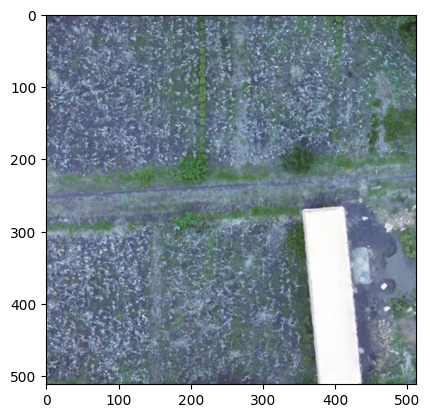

In [4]:
import os
import cv2
import matplotlib.pyplot as plt

img_discovery = cv2.imread('./Images/kenol1_1000.tif')
plt.imshow(img_discovery)
plt.show()


In [ ]:
pip install rasterio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 32.5 MB/s eta 0:00:00


(512, 512)
{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 512, 'height': 512, 'count': 1, 'crs': CRS.from_epsg(32737), 'transform': Affine(0.08780717699164597, 0.0, 292067.5720761125,
       0.0, -0.08780717699119124, 9895537.619370973)}
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 

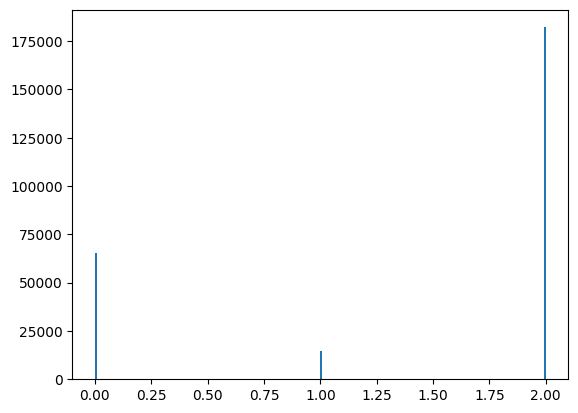

In [ ]:
# Read a raster and do some simple data discovery, lets try use rasterio to open a tiff file

from rasterio import open
import numpy as np
with open('./Labels/kenol1_1000.tif') as src:
    # Read the raster data
    label_data = src.read(1)

    # Read the metadata
    meta = src.meta

    # Print the raster data shape
    print(label_data.shape)

    # Print the metadata
    print(meta)

    print(label_data[0])

    plt.hist(label_data.ravel(), bins=256)
    plt.show()


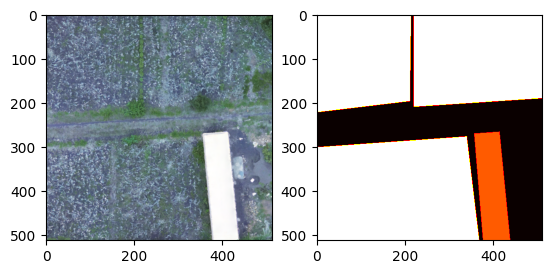

In [ ]:
# Visualize the dataset
img_discovery = cv2.imread('./Images/kenol1_1000.tif')
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(img_discovery)
ax2.imshow(label_data, cmap='hot')
plt.show()



load imports needed

# Now comes the fun part, Model Training

In [1]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

ModuleNotFoundError: No module named 'cv2'

In [2]:
import tensorflow as tf

2025-01-25 13:21:36.881194: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [ ]:
!python3 -m pip install tensorflow[and-cuda]

In [3]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


2025-01-25 13:22:15.758859: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2025-01-25 13:22:15.868591: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2025-01-25 13:22:16.459147: E tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:927] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-01-25 13:22:16.472774: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce GTX 1060 with Max-Q Design computeCapability: 6.1
coreClock: 1.3415GHz coreCount: 10 deviceMemorySize: 3.00GiB deviceMemoryBandwidth: 178.99GiB/s
2025-01-25 13:22:16.472829: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2025-01-25 13:22:16.844700: I tensorflow/str

In [7]:
!python3 -m pip install tensorflow[and-cuda]

In [6]:
img_dir = './Images'
label_dir = './Labels'



## Count the number of files in the directory, they should both be equal as each image is mapped onto a label.


In [7]:
print(len(os.listdir(img_dir)))
print(len(os.listdir(label_dir)))


1000
1000


Create variables to store images and the masks/ Labels

In [8]:
images = []
masks = []

Using all 1000 images can be heavy or our compute resource so we limit it to 25 at first

In [9]:
limit = 0
for filename in os.listdir(img_dir):
  image = cv2.imread(os.path.join(img_dir, filename))
  mask = cv2.imread(os.path.join(label_dir, filename), 0)
  images.append(image)
  masks.append(mask)
  limit+=1
  if(limit==25):
    break

In [28]:
# Print first 3 images and masks
print(len(images))
print(len(masks))

25
25


In [10]:
# Convert our datasets into to numpy arrays
images = np.array(images)
masks = np.array(masks)

In [ ]:
# Print first 3 images and masks
print(masks[:3])

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [2 2 2 ... 0 2 0]
  [2 2 2 ... 0 2 0]
  [2 2 2 ... 0 0 0]]

 [[2 2 2 ... 2 2 2]
  [2 2 2 ... 2 2 2]
  [2 2 2 ... 2 2 2]
  ...
  [0 0 0 ... 2 2 0]
  [0 0 0 ... 2 2 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 2 2 2]
  [0 0 0 ... 2 2 2]
  ...
  [0 0 0 ... 1 1 1]
  [0 0 0 ... 1 1 1]
  [0 0 0 ... 1 1 1]]]


 ## Normalize images to range [0, 1]

In [11]:
images = images / 255.0

In [31]:
print(images[:3])

[[[[0.52156863 0.6627451  0.61176471]
   [0.53333333 0.67058824 0.61568627]
   [0.41176471 0.54117647 0.49019608]
   ...
   [0.30588235 0.34509804 0.29803922]
   [0.30980392 0.34509804 0.29019608]
   [0.18431373 0.20392157 0.16470588]]

  [[0.51372549 0.65098039 0.60392157]
   [0.45490196 0.57647059 0.5254902 ]
   [0.36078431 0.4745098  0.41960784]
   ...
   [0.16862745 0.20784314 0.16078431]
   [0.19215686 0.23137255 0.18039216]
   [0.16078431 0.19215686 0.14901961]]

  [[0.45490196 0.58823529 0.53333333]
   [0.34509804 0.45098039 0.41568627]
   [0.21176471 0.30196078 0.26666667]
   ...
   [0.13333333 0.17647059 0.12941176]
   [0.16078431 0.20392157 0.14901961]
   [0.18823529 0.23137255 0.17254902]]

  ...

  [[0.41176471 0.43137255 0.47843137]
   [0.41176471 0.43137255 0.48627451]
   [0.43921569 0.45490196 0.51372549]
   ...
   [0.45490196 0.47843137 0.52941176]
   [0.47058824 0.50196078 0.54901961]
   [0.46666667 0.49411765 0.55294118]]

  [[0.43529412 0.44313725 0.49803922]
   [0.4

In [12]:
# Split images and masks into train test

x_train, x_test, y_train, y_test = train_test_split(images, masks, test_size=0.2, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(20, 512, 512, 3)
(5, 512, 512, 3)
(20, 512, 512)
(5, 512, 512)


In [13]:
y_test_cat = to_categorical(y_test,4)
y_train_cat = to_categorical(y_train,4)

In [48]:
print(y_train_cat.shape)
print(y_test_cat.shape)

(20, 512, 512, 4)
(5, 512, 512, 4)


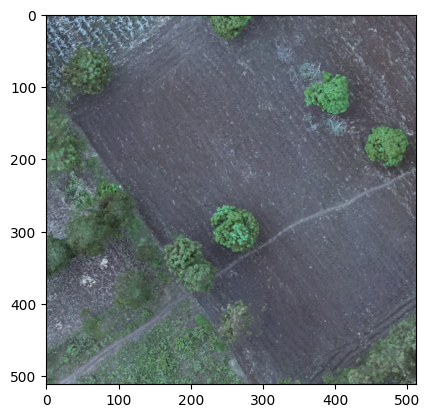

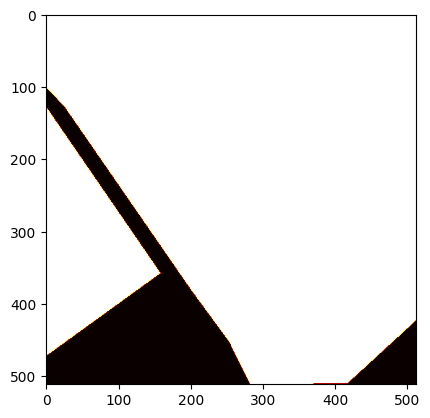

In [49]:
plt.imshow(x_train[0])
plt.show()
plt.imshow(y_train[0], cmap='hot')
plt.show()

In [14]:
from tensorflow.keras.layers import Input,Conv2D,MaxPooling2D,Conv2DTranspose,concatenate
from tensorflow.keras.models import Model

In [15]:
def unet_model(num_classes,input_shape):
    inputs = Input(shape=input_shape)
    # Encoder
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)

    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)

    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(c3)
    p3 = MaxPooling2D((2, 2))(c3)

    c4 = Conv2D(512, (3, 3), activation='relu', padding='same')(p3)
    c4 = Conv2D(512, (3, 3), activation='relu', padding='same')(c4)
    p4 = MaxPooling2D((2, 2))(c4)

    c5 = Conv2D(1024, (3, 3), activation='relu', padding='same')(p4)
    c5 = Conv2D(1024, (3, 3), activation='relu', padding='same')(c5)

    # Decoder
    u6 = Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv2D(512, (3, 3), activation='relu', padding='same')(u6)
    c6 = Conv2D(512, (3, 3), activation='relu', padding='same')(c6)

    u7 = Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(256, (3, 3), activation='relu', padding='same')(u7)
    c7 = Conv2D(256, (3, 3), activation='relu', padding='same')(c7)

    u8 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(128, (3, 3), activation='relu', padding='same')(u8)
    c8 = Conv2D(128, (3, 3), activation='relu', padding='same')(c8)

    u9 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = concatenate([u9, c1])
    c9 = Conv2D(64, (3, 3), activation='relu', padding='same')(u9)
    c9 = Conv2D(64, (3, 3), activation='relu', padding='same')(c9)

    outputs = Conv2D(num_classes, (1, 1), activation='softmax')(c9)

    model = Model(inputs=[inputs], outputs=[outputs])

    return model

In [17]:
model = unet_model(4,x_train[0].shape)
model.summary()

2024-05-23 19:41:30.825114: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-23 19:41:30.825275: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/kip/.local/lib/python3.8/site-packages/cv2/../../lib64:
2024-05-23 19:41:30.825335: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/kip/.local/lib/python3.8/site-packages/cv2/../../lib64:
2024-05-23 19:41:30.825407: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcub

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 512, 512, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 512, 512, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 512, 512, 64  36928       ['conv2d[0][0]']                 
                                )                                                             

                                                                                                  
 conv2d_16 (Conv2D)             (None, 512, 512, 64  73792       ['concatenate_3[0][0]']          
                                )                                                                 
                                                                                                  
 conv2d_17 (Conv2D)             (None, 512, 512, 64  36928       ['conv2d_16[0][0]']              
                                )                                                                 
                                                                                                  
 conv2d_18 (Conv2D)             (None, 512, 512, 4)  260         ['conv2d_17[0][0]']              
                                                                                                  
Total params: 31,031,940
Trainable params: 31,031,940
Non-trainable params: 0
_______________________________

In [38]:
tf.keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [18]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [52]:
print(y_train.shape)
print(y_train_cat.shape)

(20, 512, 512)
(20, 512, 512, 4)


## Important Notice:
This neural network/ model is quite demanding on ram / gpu. i.e the method of training in the code below is good for proof of concept. Consireding I have 24gb of ram and an nvidia GPU I can probably train more, but it can possibly take some time to run. 

Ideally you would want to  load images into memory in bits say 200 images and recursively train, while saving the model.

Here u just trained with 25 images

In [19]:
callbacks = [
    ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='min'),
    EarlyStopping(patience=10, restore_best_weights=True)
]

# Train the model
history = model.fit(
    x_train, y_train_cat,
    validation_data=(x_test, y_test_cat),
    batch_size=8,
    epochs=25,
    callbacks=callbacks
)

Epoch 1/25


2024-05-23 19:41:58.577193: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1207959552 exceeds 10% of free system memory.
2024-05-23 19:41:58.577278: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1207959552 exceeds 10% of free system memory.


1/3 [=========>....................] - ETA: 3:21 - loss: 1.3961 - accuracy: 9.2983e-05

2024-05-23 19:43:41.550523: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1207959552 exceeds 10% of free system memory.
2024-05-23 19:43:41.564306: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1207959552 exceeds 10% of free system memory.


2/3 [===================>..........] - ETA: 58s - loss: 1.3726 - accuracy: 0.2395     

2024-05-23 19:44:30.829435: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1207959552 exceeds 10% of free system memory.


3/3 [==============================] - 203s 51s/step - loss: 1.3464 - accuracy: 0.3027 - val_loss: 1.2238 - val_accuracy: 0.5056
Epoch 2/25
3/3 [==============================] - 163s 51s/step - loss: 4.8215 - accuracy: 0.4156 - val_loss: 1.1856 - val_accuracy: 0.4035
Epoch 3/25
3/3 [==============================] - 169s 51s/step - loss: 1.2051 - accuracy: 0.4287 - val_loss: 1.2601 - val_accuracy: 0.4034
Epoch 4/25
3/3 [==============================] - 173s 54s/step - loss: 1.2612 - accuracy: 0.4287 - val_loss: 1.2726 - val_accuracy: 0.4034
Epoch 5/25
3/3 [==============================] - 144s 45s/step - loss: 1.2709 - accuracy: 0.4287 - val_loss: 1.2744 - val_accuracy: 0.4034
Epoch 6/25
3/3 [==============================] - 146s 46s/step - loss: 1.2666 - accuracy: 0.4287 - val_loss: 1.2533 - val_accuracy: 0.4034
Epoch 7/25
3/3 [==============================] - 145s 45s/step - loss: 1.1636 - accuracy: 0.4287 - val_loss: 5.2512 - val_accuracy: 0.4034
Epoch 8/25
3/3 [===============

1/1 [==============================] - 1s 1s/step


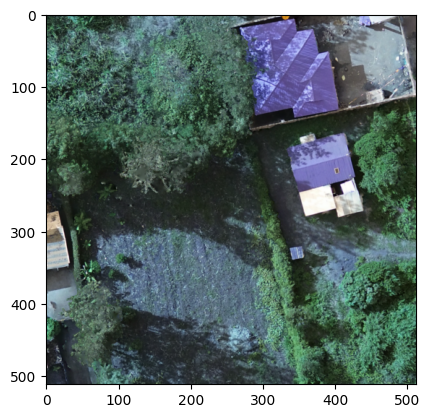

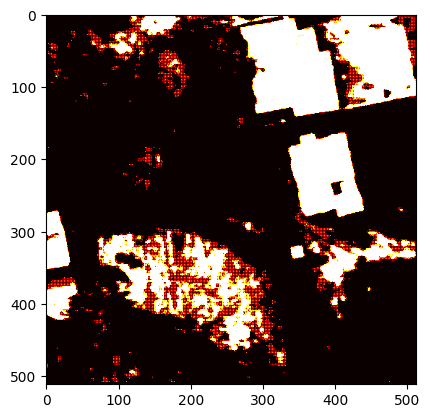

1/1 [==============================] - 1s 1s/step


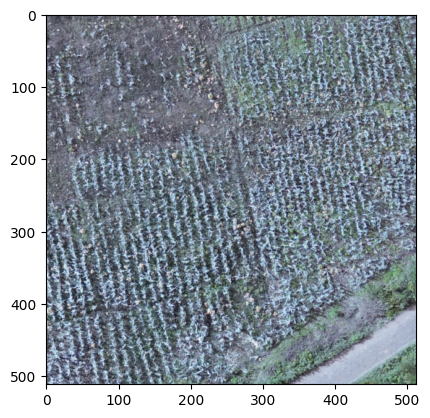

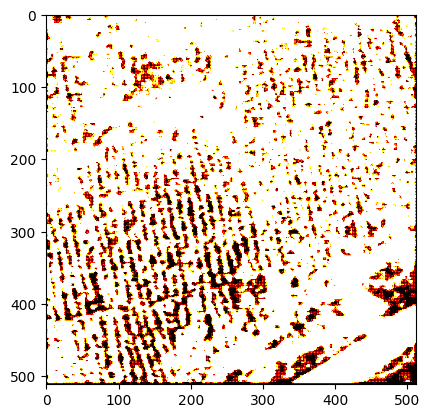

1/1 [==============================] - 1s 1s/step


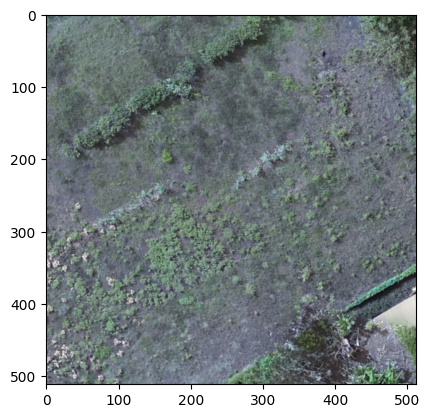

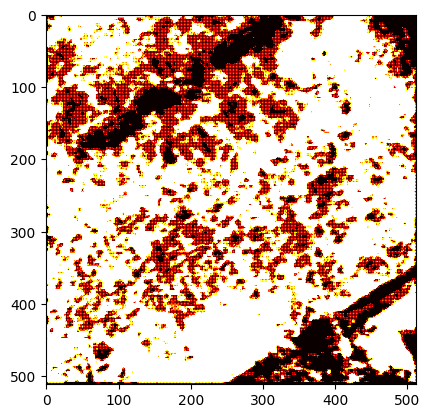

1/1 [==============================] - 1s 1s/step


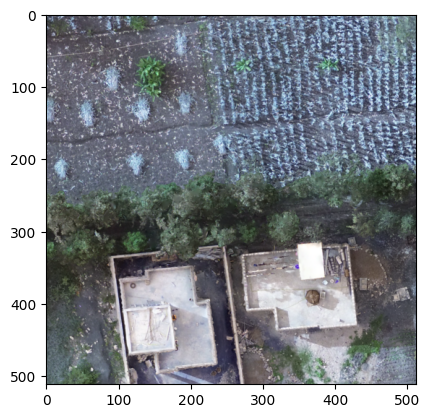

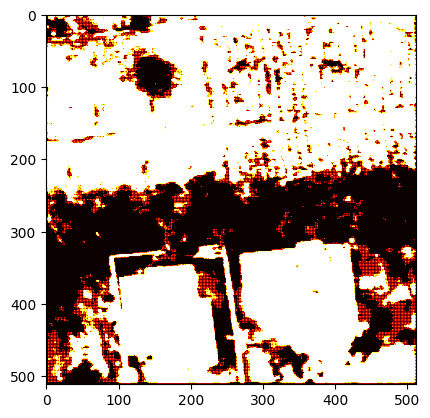

1/1 [==============================] - 2s 2s/step


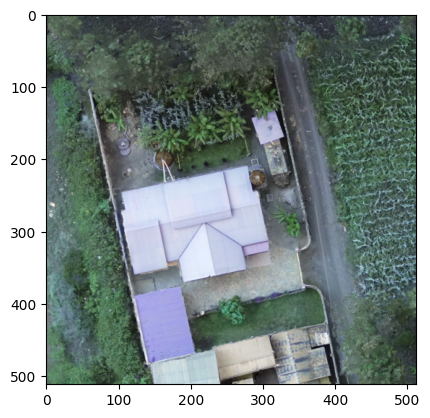

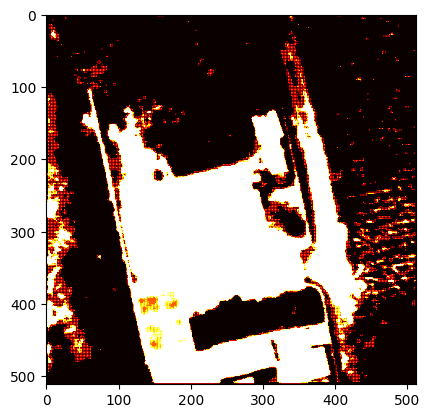

IndexError: index 5 is out of bounds for axis 0 with size 5

In [43]:
for i in range(15):
  pred = model.predict(np.expand_dims(x_test[i],axis=0))
  pred = np.argmax(pred, axis=3)[0,:,:]
  plt.imshow(x_test[i])
  plt.show()
  plt.imshow(pred, cmap='hot')
  plt.show()

# Lets us load the model and run some predictions

In [5]:
import tensorflow as tf
import numpy as np
import os, cv2
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

In [6]:
# Load the best model we had in the from the last best training we run
model = tf.keras.models.load_model('best_model.h5')

2025-01-25 13:37:34.956198: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-01-25 13:37:34.958014: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2025-01-25 13:37:34.958999: E tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:927] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-01-25 13:37:34.959033: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce GTX 1060 with Max-Q Design computeCapability: 6.1
coreClock: 1.3415GHz coreCount: 10 deviceMemorySize: 3.00GiB device

In [8]:
os.listdir('./')

['README.md',
 'Labels',
 '.git',
 'Semantic_Image_Segmentation_Drone_Imagery-Copy1.ipynb',
 '.ipynb_checkpoints',
 'best_model.h5',
 'stac-catalog-kenol-section',
 'Images',
 'Semantic_Image_Segmentation_Drone_Imagery.ipynb']

In [7]:
img_dir = './Images'
label_dir = './Labels'
images=[]
masks=[]
limit = 0
for filename in os.listdir(img_dir):
  image = cv2.imread(os.path.join(img_dir, filename))
  mask = cv2.imread(os.path.join(label_dir, filename), 0)
  images.append(image)
  masks.append(mask)
  limit+=1
  if(limit==25):
    break

In [8]:
original_image = images
images=np.array(images)
images=images/255.0

In [55]:
np.unique(masks)

array([0, 1, 2, 3], dtype=uint8)

In [10]:
class_values = [0, 1, 2, 3]
class_labels = ['Other', 'Building in Field', 'Building Footprint', 'Field Boundary']
# Define a colormap
# cmap = plt.cm.hot
# Define a qualitative colormap
cmap = plt.cm.get_cmap('hot', len(class_values))
legend_elements = [Patch(facecolor=cmap(i / len(class_values)), edgecolor='black', label=class_labels[i]) for i in class_values]

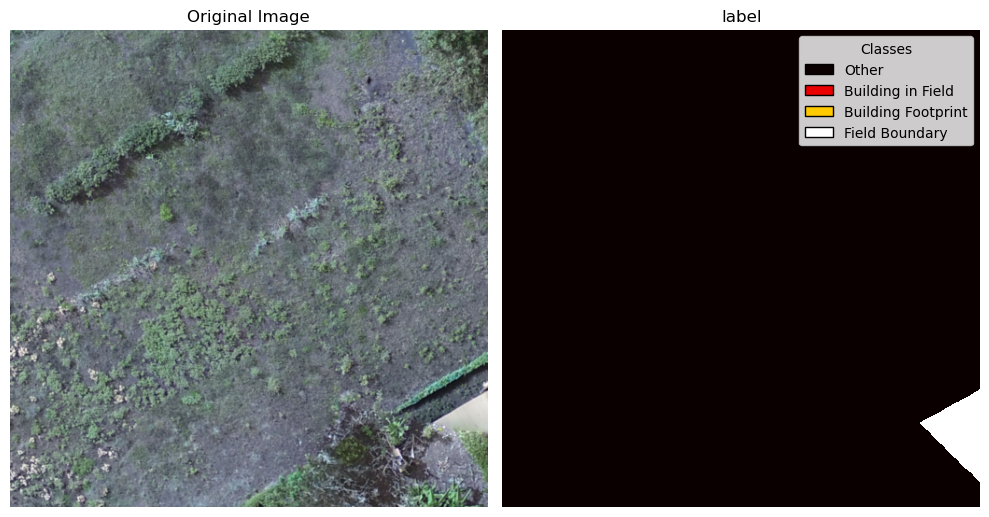

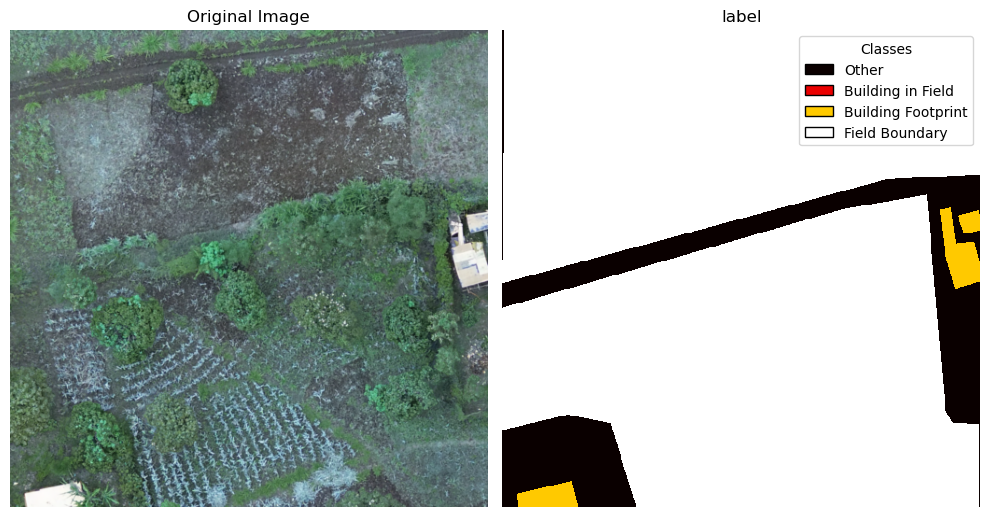

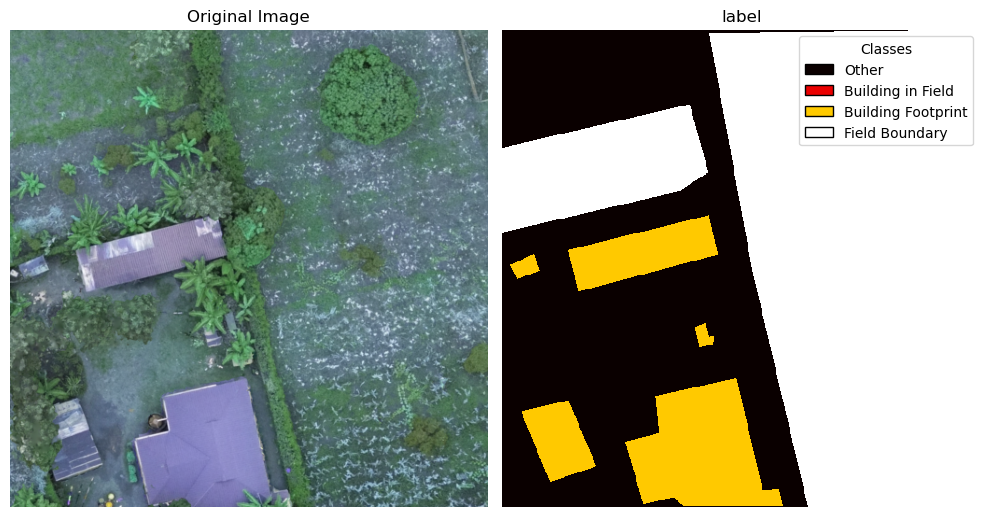

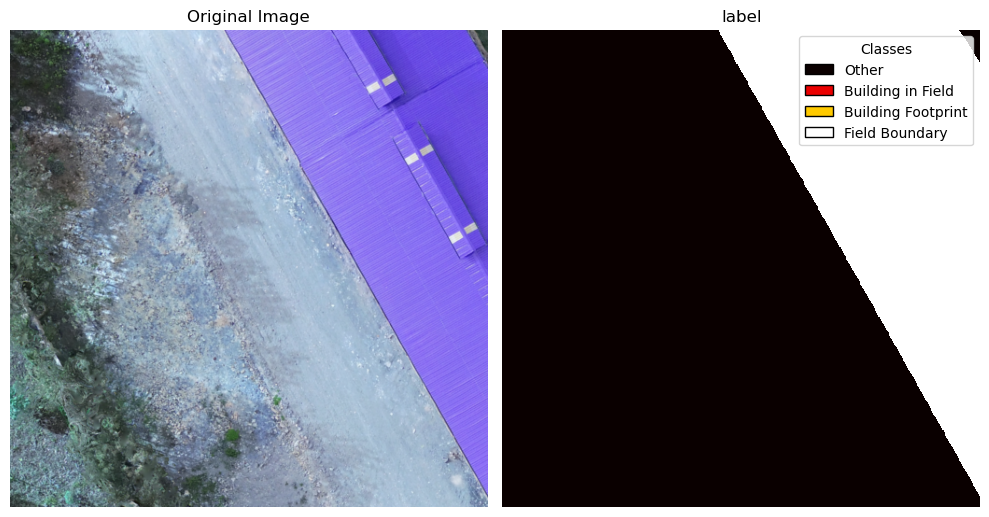

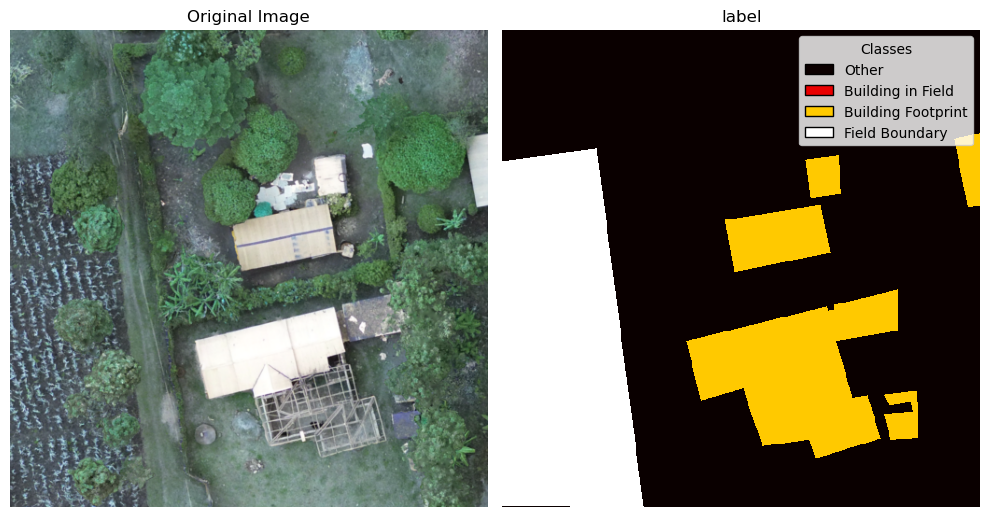

In [11]:
for i in range(5):
  fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,6))
  ax1.imshow(original_image[i])
  ax1.set_title('Original Image')
  ax1.axis('off')

  ax2.imshow(masks[i], cmap=cmap, interpolation='nearest')
  ax2.set_title('label')
  ax2.axis('off')
  ax2.legend(handles=legend_elements, loc='upper right', title='Classes')

  plt.tight_layout()
  plt.show()

In [83]:
# Lets make the predictions

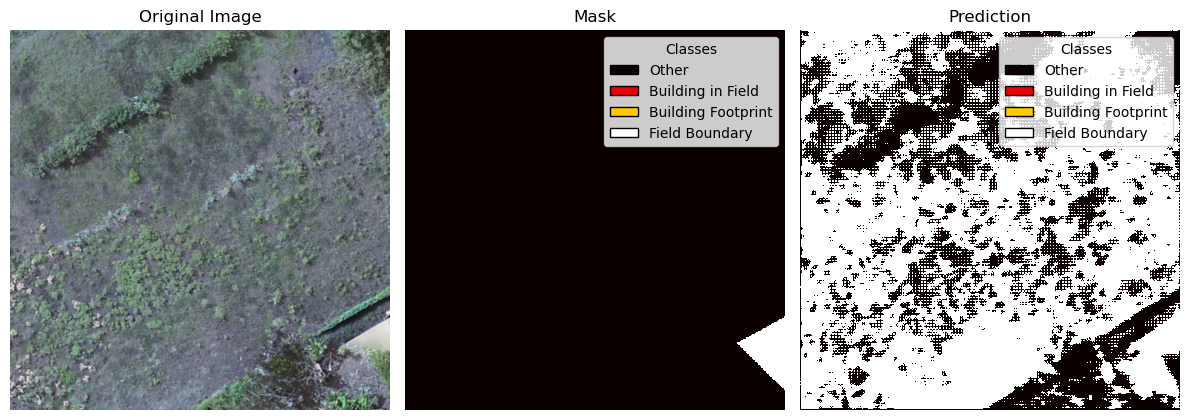

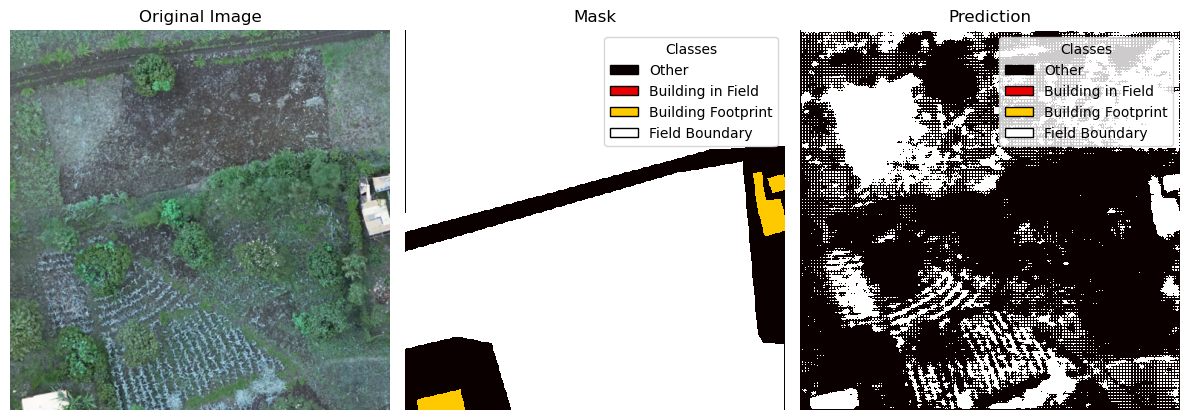

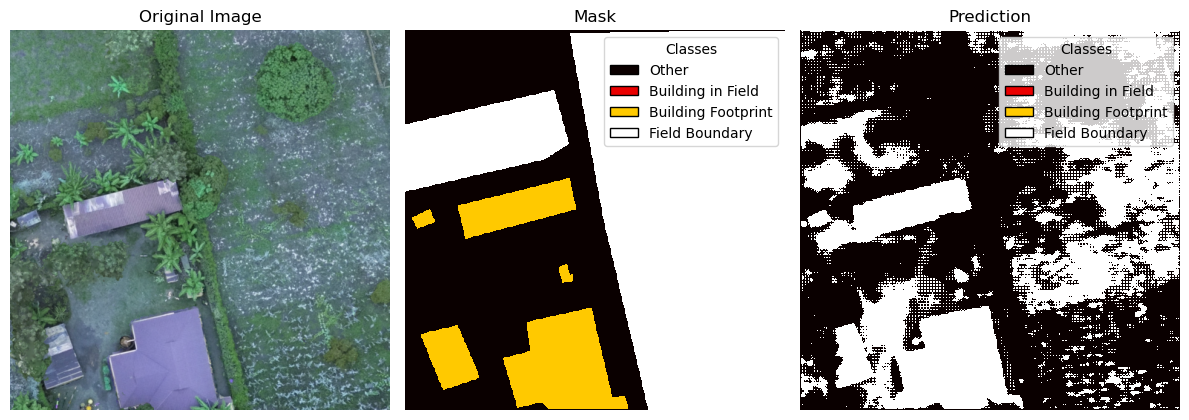

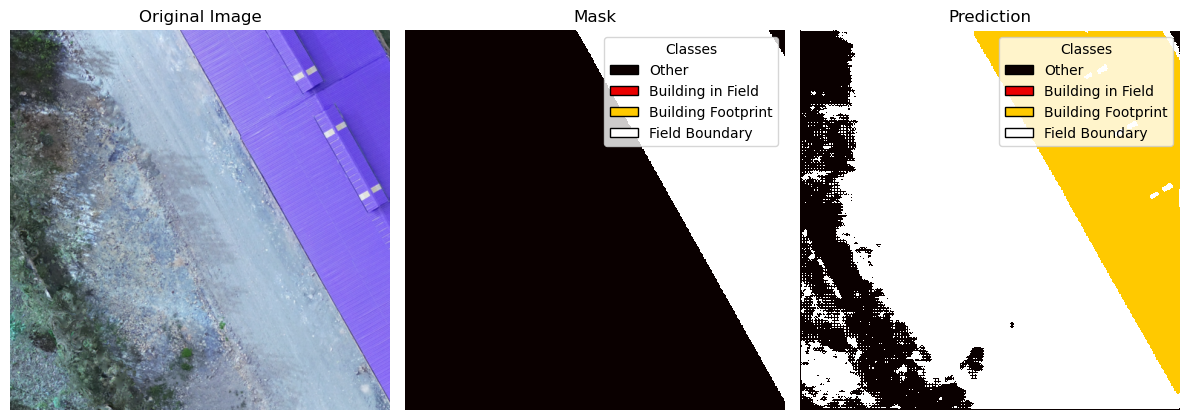

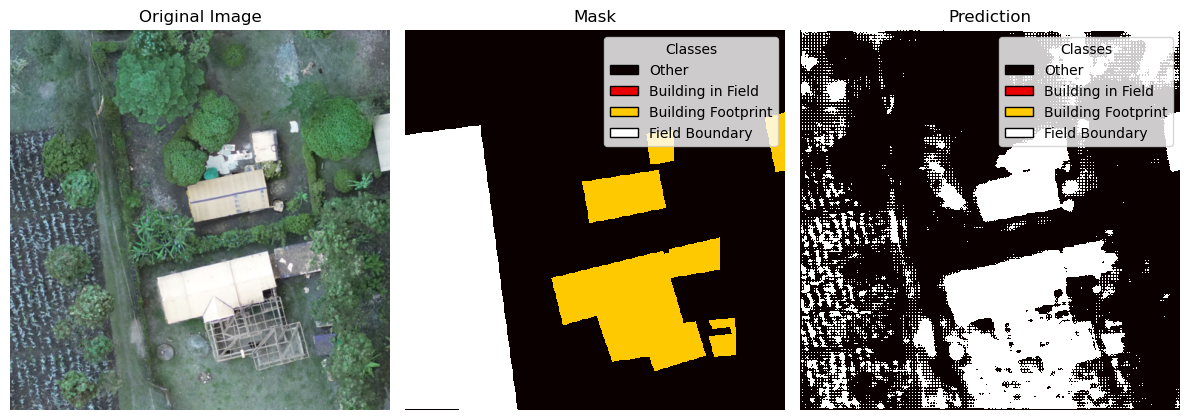

In [13]:
for i in range(5):
  pred = model.predict(np.expand_dims(images[i],axis=0),verbose=0)
  pred = np.argmax(pred, axis=3)[0,:,:]
  fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(12,5))
  ax1.imshow(images[i])
  ax1.set_title('Original Image')
  ax1.axis('off')
  
  ax2.imshow(masks[i], cmap=cmap, interpolation='nearest')
  ax2.set_title('Mask')
  ax2.axis('off')
  ax2.legend(handles=legend_elements, loc='upper right', title='Classes')

  ax3.imshow(pred, cmap=cmap, interpolation='nearest')
  ax3.set_title('Prediction')
  ax3.axis('off')
  ax3.legend(handles=legend_elements, loc='upper right', title='Classes')

  plt.tight_layout()
  plt.show()

# References
- https://www.geeksforgeeks.org/u-net-architecture-explained/
- https://www.analyticsvidhya.com/blog/2023/08/unet-architecture-mastering-image-segmentation/
- https://www.tensorflow.org/tutorials/images/segmentation
- https://www.youtube.com/@DigitalSreeni